# Project Title - Messi's-all-club-goals-analysis

In this project, I analysed Messi's all club goals. I analysed Messi's highest peak goal in season, tournament and match. Also analysed how, he scored goals, assisted by other or by himself. I learn manything from this project. Anyone can know about Messi by watching this project.

## Downloading the Dataset

I will download Messi all club goal dataset. I wil download this because, I am a big fan of Messi.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://github.com/azminewasi/Lionel-Messi-Club-Goals/blob/main/data.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Using downloaded and verified file: ./data.csv


The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [4]:
project_name = "Messi's-all-club-goals-analysis" # change this (use lowercase letters and hyphens only)

In [5]:
!pip install jovian --upgrade -q

In [6]:
import jovian

In [7]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "asad-cuet/Messi's-all-club-goals-analysis"
[jovian] Committed successfully! https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07


'https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07'

## Data Preparation and Cleaning

Empty data or any wrong format data or any wrong data have to be removed



In [8]:
import pandas

In [9]:
df=pandas.read_csv('data.csv')

In [10]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,21/22,Ligue 1,23,2/6/22,A,Paris Saint-Germain,LOSC Lille,1:5,CF,38,1:3,Left-footed shot,NaN
679,21/22,Ligue 1,30,4/3/22,H,Paris Saint-Germain,FC Lorient,5:1,RW,73,4:1,Left-footed shot,Kylian Mbappe
680,21/22,Ligue 1,34,4/23/22,H,Paris Saint-Germain,RC Lens,1:1,RW,68,1:0,Left-footed shot,Neymar
681,21/22,Ligue 1,37,5/14/22,A,Paris Saint-Germain,Montpellier,0:4,CF,6,0:1,Left-footed shot,Kylian Mbappé


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            683 non-null    object
 1   Competition       683 non-null    object
 2   Matchday          683 non-null    object
 3   Date              683 non-null    object
 4   Venue             683 non-null    object
 5   Club              683 non-null    object
 6   Opponent          683 non-null    object
 7   Result            683 non-null    object
 8   Playing_Position  683 non-null    object
 9   Minute            683 non-null    object
 10  At_score          683 non-null    object
 11  Type              682 non-null    object
 12  Goal_assist       474 non-null    object
dtypes: object(13)
memory usage: 69.5+ KB


##### Goal_assist:
We see in dataset information in Gaol_assist column, there is null value. But it's not error. There are some goal which is not assisted by others player.

##### Type:
In Type column, there is 1 null value. But we won't remove this row, because the goal is not error.

##### Observing & modifying Goal_assist column

In [12]:
df.Goal_assist.unique()

array(['Ronaldinho Gaacho', nan, 'Samuel Etoo', 'Mark van Bommel',
       'Sylvinho', 'Ludovic Giuly', 'Andres Iniesta', 'Deco', 'Xavi',
       'Giovanni van Bronckhorst', 'Gianluca Zambrotta', 'Thierry Henry',
       'Bojan Krkic', 'Dani Alves', 'Aleksandr Hleb', 'Gerard Pique',
       'Zlatan Ibrahimovic', 'Pedro', 'Ã‰ric Abidal', 'Yaya Toure',
       'Seydou Keita', 'Maxwell', 'David Villa', 'Thiago', 'Adriano',
       'Ibrahim Afellay', 'Sergio Busquets', 'Cesc Fabregas',
       'Alexis Sanchez', 'Cristian Tello', 'Isaac Cuenca', 'Jordi Alba',
       'Marta Montoya', 'Neymar', 'Alex Song', 'Antonio Amaya',
       'Marc Bartra', 'Rafinha', 'Luis Suarez', 'Ivan Rakitic',
       'Arda Turan', 'Munir El Haddadi', 'Lucas Digne', 'Sergi Roberto',
       'Javier Mascherano', 'Paco Alcacer', 'Paulinho', 'Aleix Vidal',
       'Denis Suarez', 'Ousmane Dembele', 'Philippe Coutinho',
       'Arturo Vidal', 'Nelson Semedo', 'Malcom', 'Clement Lenglet',
       'Antoine Griezmann', 'Arthur', 'Fre

See there is a 'nan' value . Though it's not error. We will replace this nan value by 'Own'

In [13]:
import numpy as np

df['Goal_assist'] = df['Goal_assist'].replace(np.nan, 'Own')

In [14]:
df.Goal_assist.unique()

array(['Ronaldinho Gaacho', 'Own', 'Samuel Etoo', 'Mark van Bommel',
       'Sylvinho', 'Ludovic Giuly', 'Andres Iniesta', 'Deco', 'Xavi',
       'Giovanni van Bronckhorst', 'Gianluca Zambrotta', 'Thierry Henry',
       'Bojan Krkic', 'Dani Alves', 'Aleksandr Hleb', 'Gerard Pique',
       'Zlatan Ibrahimovic', 'Pedro', 'Ã‰ric Abidal', 'Yaya Toure',
       'Seydou Keita', 'Maxwell', 'David Villa', 'Thiago', 'Adriano',
       'Ibrahim Afellay', 'Sergio Busquets', 'Cesc Fabregas',
       'Alexis Sanchez', 'Cristian Tello', 'Isaac Cuenca', 'Jordi Alba',
       'Marta Montoya', 'Neymar', 'Alex Song', 'Antonio Amaya',
       'Marc Bartra', 'Rafinha', 'Luis Suarez', 'Ivan Rakitic',
       'Arda Turan', 'Munir El Haddadi', 'Lucas Digne', 'Sergi Roberto',
       'Javier Mascherano', 'Paco Alcacer', 'Paulinho', 'Aleix Vidal',
       'Denis Suarez', 'Ousmane Dembele', 'Philippe Coutinho',
       'Arturo Vidal', 'Nelson Semedo', 'Malcom', 'Clement Lenglet',
       'Antoine Griezmann', 'Arthur', 'F

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            683 non-null    object
 1   Competition       683 non-null    object
 2   Matchday          683 non-null    object
 3   Date              683 non-null    object
 4   Venue             683 non-null    object
 5   Club              683 non-null    object
 6   Opponent          683 non-null    object
 7   Result            683 non-null    object
 8   Playing_Position  683 non-null    object
 9   Minute            683 non-null    object
 10  At_score          683 non-null    object
 11  Type              682 non-null    object
 12  Goal_assist       683 non-null    object
dtypes: object(13)
memory usage: 69.5+ KB


Now, there is no empty cells in Goal_assist

##### Observing Others

In [16]:
df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,683,683,683,683,683,683,683,683,683,683,683,682,683
unique,18,7,48,439,2,2,88,46,9,96,38,12,65
top,11/12,LaLiga,Group Stage,3/7/12,H,FC Barcelona,Sevilla FC,4:0,CF,55,1:0,Left-footed shot,Own
freq,73,474,76,5,410,672,38,45,266,13,96,422,209


There is no error

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "asad-cuet/messis-all-club-goals-analysis-02a07" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07


'https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07'

## Exploratory Analysis and Visualization

We will visualize data distribution of different columns here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Visualizing here, in which season messi did  most goals

In [20]:
df.Season.unique()

array(['04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11',
       '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18',
       '18/19', '19/20', '20/21', '21/22'], dtype=object)

In [21]:
goal_in_season = df.Season.value_counts()

goal_in_season

11/12    73
12/13    60
14/15    58
16/17    54
10/11    53
18/19    51
09/10    47
17/18    45
13/14    41
15/16    41
08/09    38
20/21    38
19/20    31
06/07    17
07/08    16
21/22    11
05/06     8
04/05     1
Name: Season, dtype: int64

Text(0, 0.5, 'Season')

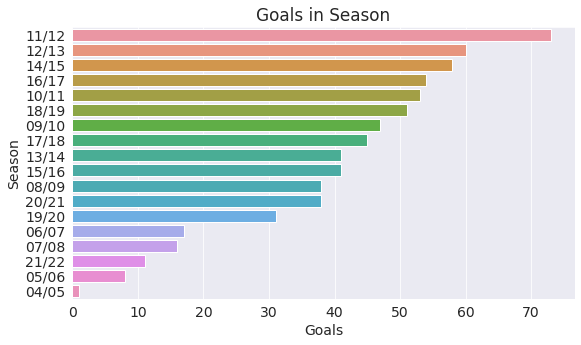

In [22]:
sns.barplot(
x=goal_in_season,
y=goal_in_season.index,
data=df
);

plt.title('Goals in Season')
plt.xlabel('Goals')
plt.ylabel('Season')


We see, Messi did most goals in 11/12 season and that is 73 goals

We see in 11/12 season messi did most goals 73. And 2nd highest is 12/13 season that is 60 goals

##### Visualizing here, in which competition messi did most goals

In [23]:
df.Competition.unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1'], dtype=object)

In [24]:
competition_goals=df.Competition.value_counts()
competition_goals

LaLiga                   474
UEFA Champions League    125
Copa del Rey              56
Supercopa                 14
Ligue 1                    6
FIFA Club World Cup        5
UEFA Super Cup             3
Name: Competition, dtype: int64

Text(0, 0.5, 'Tournaments')

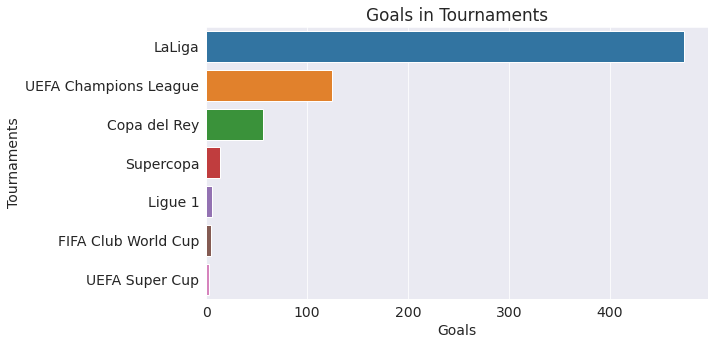

In [25]:
sns.barplot(
x=competition_goals,
y=competition_goals.index,
data=df
);

plt.title('Goals in Tournaments')
plt.xlabel('Goals')
plt.ylabel('Tournaments')


We see, Messi did most goals in Laliga and that is 474

##### Visualizing here, in which opponent messi did most goals

In [26]:
opponent_goals=df.Opponent.value_counts()
opponent_goals

Sevilla FC                38
Atletico de Madrid        32
Valencia CF               31
Athletic Bilbao           29
Real Madrid               26
                          ..
Sporting CP                1
Benidorm CD                1
Rangers FC                 1
SV Werder Bremen           1
Club Atletico de Ceuta     1
Name: Opponent, Length: 88, dtype: int64

Text(0, 0.5, 'Opponents')

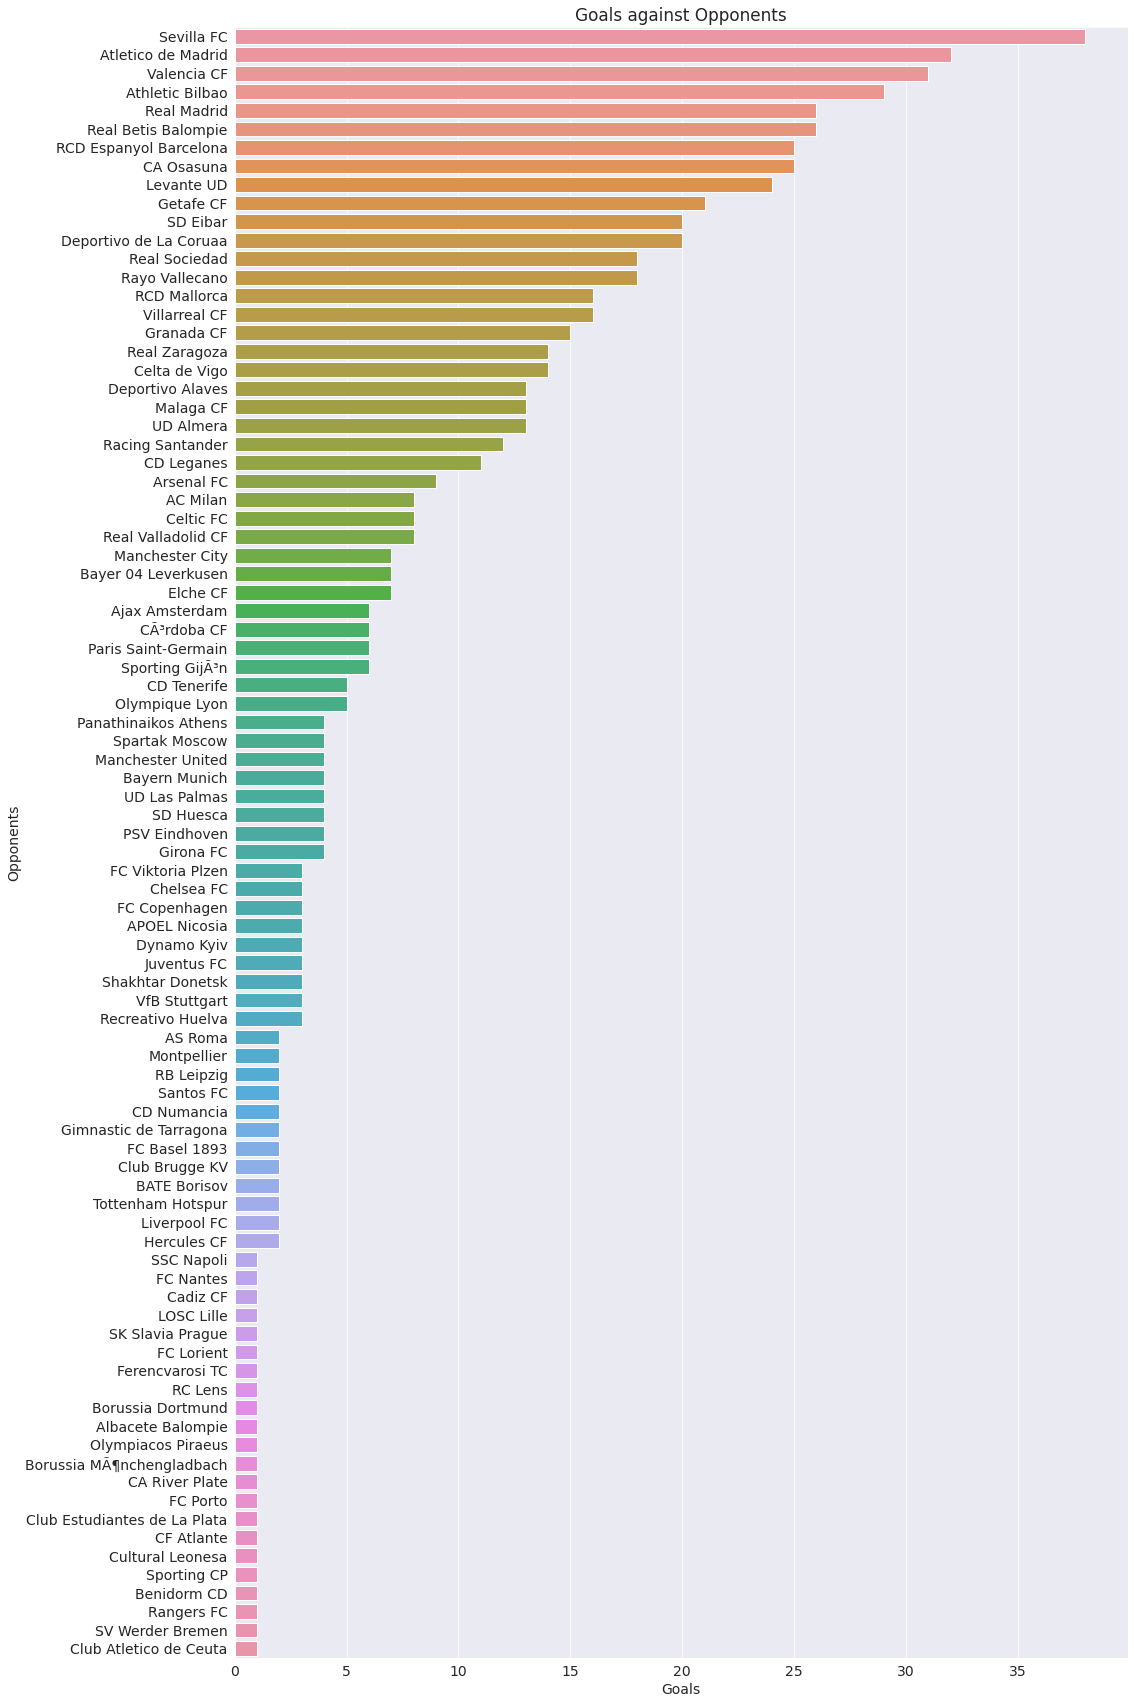

In [27]:
plt.figure(figsize=(16,30))
sns.barplot(
x=opponent_goals,
y=opponent_goals.index,
data=df
);

plt.title('Goals against Opponents')
plt.xlabel('Goals')
plt.ylabel('Opponents')


We see, Messi did highest goals against Sevilla Fc

##### Visualizing here, messi's Laliga goals

In [28]:
laliga_df=df[df['Competition']=='LaLiga']

laliga_df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho
5,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:3,CF,75,0:2,Right-footed shot,Sylvinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,20/21,LaLiga,33,4/29/21,H,FC Barcelona,Granada CF,1:2,CF,23,1:0,Left-footed shot,Antoine Griezmann
668,20/21,LaLiga,34,5/2/21,A,FC Barcelona,Valencia CF,2:3,CF,57,1:1,Left-footed shot,Own
669,20/21,LaLiga,34,5/2/21,A,FC Barcelona,Valencia CF,2:3,CF,69,1:3,Direct free kick,Own
670,20/21,LaLiga,36,5/11/21,A,FC Barcelona,Levante UD,3:3,SS,25,0:1,Left-footed shot,Own


In [29]:
laliga_goals=laliga_df.Season.value_counts()

laliga_goals

11/12    50
12/13    46
14/15    43
16/17    37
18/19    36
17/18    34
09/10    34
10/11    31
20/21    30
13/14    28
15/16    26
19/20    25
08/09    23
06/07    14
07/08    10
05/06     6
04/05     1
Name: Season, dtype: int64

Text(0, 0.5, 'Season')

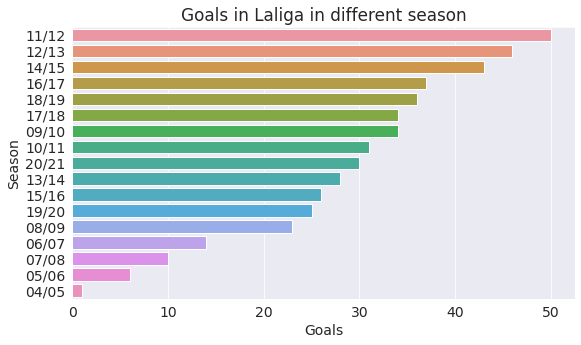

In [30]:
sns.barplot(
x=laliga_goals,
y=laliga_goals.index,
data=df
);

plt.title('Goals in Laliga in different season')
plt.xlabel('Goals')
plt.ylabel('Season')

Wee see, messi did most goals in laliga in 11/12 season

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "asad-cuet/messis-all-club-goals-analysis-02a07" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07


'https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07'

## Asking and Answering Questions

We will know more about Messi's goal here.



#### Q1: Who assisted Messi most?

In [33]:
most_assist=df.Goal_assist.value_counts()
most_assist

Own               209
Luis Suarez        48
Dani Alves         42
Andres Iniesta     39
Xavi               34
                 ... 
Aleksandr Hleb      1
Antonio Amaya       1
Alex Song           1
Maxwell             1
Aleix Vidal         1
Name: Goal_assist, Length: 65, dtype: int64

We see above, Luis Suarez is the player who assisted Messi most. But there is 209 goals which is assisted by anyone. Messi scored these goals by himself. That is extra-ordinary

#### Q2: By which body part messi scored most?

In [34]:
df.Type.value_counts()

Left-footed shot          422
Penalty                    84
Right-footed shot          81
Direct free kick           50
Header                     24
Tap-in                      9
Solo run                    4
Penalty rebound             3
Deflected shot on goal      2
Counter attack goal         1
Chest                       1
Long distance kick          1
Name: Type, dtype: int64

We see above, Messi scored most goals by his left foot and that is 422 goals

#### Q3: In which game Messi scored most?

In [35]:
df.Date.value_counts()

3/7/12     5
9/19/17    4
1/27/13    4
4/6/10     4
2/22/20    4
          ..
3/9/13     1
3/2/13     1
2/23/13    1
2/10/13    1
4/20/14    1
Name: Date, Length: 439, dtype: int64

In [36]:
high_goal_df=df[df['Date']=='3/7/12']
high_goal_df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
223,11/12,UEFA Champions League,last 16,3/7/12,H,FC Barcelona,Bayer 04 Leverkusen,7:1,CF,25,1:0,Left-footed shot,Xavi
224,11/12,UEFA Champions League,last 16,3/7/12,H,FC Barcelona,Bayer 04 Leverkusen,7:1,CF,42,2:0,Left-footed shot,Andres Iniesta
225,11/12,UEFA Champions League,last 16,3/7/12,H,FC Barcelona,Bayer 04 Leverkusen,7:1,CF,50,3:0,Right-footed shot,Cesc Fabregas
226,11/12,UEFA Champions League,last 16,3/7/12,H,FC Barcelona,Bayer 04 Leverkusen,7:1,CF,58,5:0,Left-footed shot,Own
227,11/12,UEFA Champions League,last 16,3/7/12,H,FC Barcelona,Bayer 04 Leverkusen,7:1,CF,85,7:0,Left-footed shot,Seydou Keita


We see in above dataset, Messi scored 5 goals in a single match. That match was against Bayer 04 Leverkusen. The Season was 11/12 and Date was 3/7/12

#### Q4: From which position Messi scored most goals?

In [37]:
df.Playing_Position.value_counts()

CF     266
RW     220
RW      95
CF      40
SS      32
SS      18
AM       7
AM       4
LW       1
Name: Playing_Position, dtype: int64

We see above, As a CF player messi scored most, that is 266 goals. 

#### Q5: How much match Messi won?

In [38]:
pandas.set_option('display.max_rows', df.shape[0]+1)
dup=df.Date.duplicated()
dup

0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15      True
16     False
17     False
18     False
19      True
20     False
21      True
22     False
23      True
24     False
25      True
26     False
27     False
28      True
29     False
30      True
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39      True
40     False
41     False
42     False
43     False
44      True
45     False
46     False
47      True
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56      True
57     False
58     False
59      True
60      True
61     False
62     False
63     False
64      True
65     False
66      True
67     False
68     False
69     False
70     False
71     False
72     False
73      True
74     False
75     False
76     False

In [39]:
df[4:8]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho
5,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:3,CF,75,0:2,Right-footed shot,Sylvinho
6,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:3,CF,83,0:3,Left-footed shot,Ronaldinho Gaacho
7,05/06,Copa del Rey,Quarter-Finals,2/1/06,H,FC Barcelona,Real Zaragoza,2:1,CF,42,1:0,Header,Ludovic Giuly


See above in row 5,6. These are same match and these result is 1 match result. So we need avoid same match result

In [40]:
new_df=df.copy()

In [41]:
i=0

for x in dup:
    if(x==True):
        new_df.drop(i,inplace=True)
        print(x,i)
    i=i+1
    

True 6
True 14
True 15
True 19
True 21
True 23
True 25
True 28
True 30
True 39
True 44
True 47
True 56
True 59
True 60
True 64
True 66
True 73
True 77
True 81
True 84
True 86
True 92
True 97
True 98
True 100
True 105
True 107
True 108
True 110
True 112
True 113
True 116
True 117
True 118
True 121
True 123
True 126
True 128
True 129
True 132
True 136
True 138
True 140
True 145
True 147
True 148
True 151
True 153
True 156
True 157
True 161
True 163
True 165
True 166
True 171
True 173
True 178
True 182
True 185
True 187
True 188
True 190
True 191
True 193
True 195
True 197
True 198
True 200
True 201
True 208
True 210
True 212
True 214
True 215
True 219
True 220
True 221
True 224
True 225
True 226
True 227
True 229
True 232
True 233
True 237
True 239
True 242
True 244
True 246
True 247
True 249
True 250
True 251
True 254
True 257
True 260
True 262
True 264
True 266
True 267
True 269
True 272
True 274
True 276
True 278
True 280
True 282
True 284
True 286
True 294
True 295
True 296
True 300


Same match row is removed

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 681
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            439 non-null    object
 1   Competition       439 non-null    object
 2   Matchday          439 non-null    object
 3   Date              439 non-null    object
 4   Venue             439 non-null    object
 5   Club              439 non-null    object
 6   Opponent          439 non-null    object
 7   Result            439 non-null    object
 8   Playing_Position  439 non-null    object
 9   Minute            439 non-null    object
 10  At_score          439 non-null    object
 11  Type              438 non-null    object
 12  Goal_assist       439 non-null    object
dtypes: object(13)
memory usage: 48.0+ KB


From above we see Messi scored in 439 Matches

In [43]:
new_df.Date.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
16     False
17     False
18     False
20     False
22     False
24     False
26     False
27     False
29     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
40     False
41     False
42     False
43     False
45     False
46     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
57     False
58     False
61     False
62     False
63     False
65     False
67     False
68     False
69     False
70     False
71     False
72     False
74     False
75     False
76     False
78     False
79     False
80     False
82     False
83     False
85     False
87     False
88     False
89     False
90     False
91     False
93     False
94     False
95     False
96     False
99     False
101    False
102    False

Now, there is no duplicated matche

In [44]:
new_df.sample(3)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
353,13/14,LaLiga,36,5/3/14,H,FC Barcelona,Getafe CF,2:2,CF,23,1:0,Left-footed shot,Dani Alves
186,11/12,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:0,CF,5,1:0,Left-footed shot,Dani Alves
313,13/14,LaLiga,1,8/18/13,H,FC Barcelona,Levante UD,7:0,CF,13,2:0,Left-footed shot,Pedro


In [45]:
result=new_df.Result
cnt=0
for x in result:
    if(x[0]>x[2]):
        cnt=cnt+1
        
print(cnt)            

239


Therefore, Messi scored in 439 matches. In these, Messi won 385 matches

Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "asad-cuet/messis-all-club-goals-analysis-02a07" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07


'https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07'

## Inferences and Conclusion


From Q-1 we can say messi have good combination with Luis Suarez, Dani Alves, Xavi and Iniesta. He got most assist from them. Messi scored 209 goals by his own. So he isn't dependent on other player only. He can create goals by himself. Messi's most goal peak was in 11//12 season. He broke highest calender year goal that year. 

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "asad-cuet/messis-all-club-goals-analysis-02a07" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07


'https://jovian.ai/asad-cuet/messis-all-club-goals-analysis-02a07'

## References and Future Work


Dataset link: https://github.com/azminewasi/Lionel-Messi-Club-Goals/

I will analyse Messi vs cristiano Ronaldo goals in future. This dataset will useful for that analysis.

In [50]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>